<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/Evianita_Rifka_Yulistia__Kelompok1_Praktik1_Modul4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anda merupakan seorang Junior Analyst baru di sebuah perusahaan properti yang berbasis di New York, Amerika Serikat. Sebelum memasuki tahun baru, Supervisor meminta Anda untuk melakukan analisa untuk mendapatkan informasi terkait dengan beberapa pertanyaan di bawah ini pada Google Collab :

Sebelum Anda melakukan analisis, Anda juga diharapkan untuk melakukan cleaning terhadap beberapa aspek di bawah ini, yang meliputi

1. Missing Value
2. Duplicate
3. Typos
4. Outliers

**Persiapan Data**

In [ ]:
# Mengimpor Library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# code ini untuk menghilangkan warning message saat kita menjalankan code-code
# kita di bawah
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Membuka data dari file excel
Data = 'AB_NYC_2019.xlsx'
df = pd.read_excel(Data)

In [ ]:
# tampilkan jumlah baris data
df.shape

(5018, 15)

In [ ]:
# Menampilkan 10 baris pertama
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0
5,19054683,Fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,NaN,NaT,NaN,0
6,36243183,Spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,NaN,NaT,NaN,81
7,33528562,"Private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,NaN,NaT,NaN,116
8,18442048,Clean-N-Comfy Bronx Pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,NaN,NaT,NaN,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,NaN,NaT,NaN,84


**1. Pengecekan Missing Value**

In [ ]:
# Pengecekan missing value
df.isnull().sum()

,0
id,0
name,1
host_id,0
host_name,2
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,52


In [ ]:
# Untuk melihat summary data kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5018 non-null   int64         
 1   name                 5017 non-null   object        
 2   host_id              5018 non-null   int64         
 3   host_name            5016 non-null   object        
 4   neighbourhood_group  5018 non-null   object        
 5   neighbourhood        5018 non-null   object        
 6   latitude             5018 non-null   float64       
 7   longitude            5018 non-null   float64       
 8   room_type            5018 non-null   object        
 9   price                4966 non-null   float64       
 10  minimum_nights       5018 non-null   int64         
 11  number_of_reviews    4143 non-null   float64       
 12  last_review          4143 non-null   datetime64[ns]
 13  reviews_per_month    4143 non-nul

In [ ]:
# hitung proporsi missing value di tiap kolom
df.isna().sum()/df.shape[0] * 100
# dikali 100 agar jadi persen

# shape[0] untuk mengambil jumlah baris

,0
id,0.000000
name,0.019928
host_id,0.000000
host_name,0.039857
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,1.036269


In [ ]:
# hitung proporsi juga bisa jadi mean
df.isna().mean()

# menghitung jumlah baris/total baris keseluruhan

,0
id,0.000000
name,0.000199
host_id,0.000000
host_name,0.000399
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.010363


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom untuk memastikan.
# Kita akan mengecek reviews per month
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,35684596,Homey & Cozy room in queens!,83132880,Alyandry,Queens,Maspeth,40.73888,-73.89486,Private room,NaN,1,NaN,NaT,NaN,321
871,36448215,Welcome to Quite Cozy,274040642,Ms. Tou,Queens,Cambria Heights,40.69000,-73.73098,Private room,NaN,1,NaN,NaT,NaN,175
872,36409903,Near the city,273536212,Marjorie,Queens,Cambria Heights,40.69973,-73.74592,Private room,NaN,1,NaN,NaT,NaN,339
873,36236515,TRANQUIL HAVEN -8MINS TO JFK/LIRR/AIRTRAIN#3.,178272943,Sharon,Queens,Jamaica,40.67189,-73.78008,Private room,NaN,1,NaN,NaT,NaN,70


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom untuk memastikan.
# Kita akan mengecek last review
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,35684596,Homey & Cozy room in queens!,83132880,Alyandry,Queens,Maspeth,40.73888,-73.89486,Private room,NaN,1,NaN,NaT,NaN,321
871,36448215,Welcome to Quite Cozy,274040642,Ms. Tou,Queens,Cambria Heights,40.69000,-73.73098,Private room,NaN,1,NaN,NaT,NaN,175
872,36409903,Near the city,273536212,Marjorie,Queens,Cambria Heights,40.69973,-73.74592,Private room,NaN,1,NaN,NaT,NaN,339
873,36236515,TRANQUIL HAVEN -8MINS TO JFK/LIRR/AIRTRAIN#3.,178272943,Sharon,Queens,Jamaica,40.67189,-73.78008,Private room,NaN,1,NaN,NaT,NaN,70


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom untuk memastikan.
# Kita akan mengecek number of reviews
df[df['number_of_reviews'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,35684596,Homey & Cozy room in queens!,83132880,Alyandry,Queens,Maspeth,40.73888,-73.89486,Private room,NaN,1,NaN,NaT,NaN,321
871,36448215,Welcome to Quite Cozy,274040642,Ms. Tou,Queens,Cambria Heights,40.69000,-73.73098,Private room,NaN,1,NaN,NaT,NaN,175
872,36409903,Near the city,273536212,Marjorie,Queens,Cambria Heights,40.69973,-73.74592,Private room,NaN,1,NaN,NaT,NaN,339
873,36236515,TRANQUIL HAVEN -8MINS TO JFK/LIRR/AIRTRAIN#3.,178272943,Sharon,Queens,Jamaica,40.67189,-73.78008,Private room,NaN,1,NaN,NaT,NaN,70


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom untuk memastikan.
# Kita akan mengecek price
df[df['price'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
146,36379669,Shared living space in the Bronx!,44378432,Bryan,Bronx,Pelham Bay,40.84735,-73.83095,Shared room,NaN,1,NaN,NaT,NaN,88
238,35985735,One Bedroom Oasis in the Heart of Brooklyn,70538107,Claire,Brooklyn,Bushwick,40.68834,-73.90714,Private room,NaN,1,NaN,NaT,NaN,16
867,10161361,"Cozy room, near LaGuardia Airport",2995352,Rachel,Queens,Jackson Heights,40.75658,-73.86807,Private room,NaN,1,NaN,NaT,NaN,0
868,21597223,ASTORIA Beautiful Room in Fully Renovated Apt,157087092,Leslie,Queens,Ditmars Steinway,40.77620,-73.90623,Private room,NaN,1,NaN,NaT,NaN,0
869,14120153,Large and Luminous room available for female only,44702712,Jasmine,Queens,Briarwood,40.70648,-73.81491,Private room,NaN,1,NaN,NaT,NaN,0
870,35684596,Homey & Cozy room in queens!,83132880,Alyandry,Queens,Maspeth,40.73888,-73.89486,Private room,NaN,1,NaN,NaT,NaN,321
871,36448215,Welcome to Quite Cozy,274040642,Ms. Tou,Queens,Cambria Heights,40.69000,-73.73098,Private room,NaN,1,NaN,NaT,NaN,175
872,36409903,Near the city,273536212,Marjorie,Queens,Cambria Heights,40.69973,-73.74592,Private room,NaN,1,NaN,NaT,NaN,339
873,36236515,TRANQUIL HAVEN -8MINS TO JFK/LIRR/AIRTRAIN#3.,178272943,Sharon,Queens,Jamaica,40.67189,-73.78008,Private room,NaN,1,NaN,NaT,NaN,70
874,34284316,Bedroom,180991373,Vicky,Queens,Flushing,40.74265,-73.82310,Private room,NaN,1,NaN,NaT,NaN,23


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom untuk memastikan.
# Kita akan mengecek host name
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
3925,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50.0,1,43.0,2019-07-08,0.45,88
4084,30425770,Queens Corner Lot,128580688,NaN,Queens,Queens Village,40.70524,-73.73349,Entire home/apt,150.0,1,51.0,2019-07-07,7.43,248


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom untuk memastikan.
# Kita akan mengecek name
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
120,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130.0,1,NaN,NaT,NaN,365


**2. Pengecekan Data Duplicate**

In [ ]:
# Pengecekan Data Duplicate
df.duplicated().sum()

19

In [ ]:
# hapus data duplikat
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
# Hapus data duplikat dengan inplace=True, lalu reset indeks terpisah
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

**3. Pengecekan Typos**

In [ ]:
# mari kita lihat isi dari kolom name
df["name"].unique()

array(['Cozy Living Room Futon',
       'Large private room w/ 2 built-in closets',
       'Furnished room  for rent in Bronx SINGLE FEMALE', ...,
       'Steps away from Laguardia airport', 'Room Near JFK Twin Beds',
       'Room near JFK Queen Bed'], dtype=object)

In [ ]:
# mari kita lihat isi dari kolom name
df['name'].value_counts()

,count
name,
Hillside Hotel,18
Home away from home,8
New york Multi-unit building,5
"步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐",3
Prolonged Traveler's Dream (a month first & more),3
...,...
Astoria's Tranquil Home Away From Home,1
Super Cozy Studio Apartment,1
cozy zen master bedroom minutes from Manhattan.,1


In [ ]:
# mari kita samakan value di kolom name menjadi lowercase
df['name'] = df['name'].str.lower()

In [ ]:
# lakukan pengecekan kembali ke kolom name
df['name'].value_counts()


,count
name,
hillside hotel,18
home away from home,12
new york multi-unit building,5
home sweet home,4
cozy room,4
...,...
exclusive home near jfk and long island rail road.,1
mini casa,1
town home one,1


# Menyelesaikan Missing Value

**Pengecekan kolom number_of_review**

In [ ]:
# kita lihat distribusi data di kolom kategorik number_of_review
df['number_of_reviews'].value_counts()

,count
number_of_reviews,
1.0,404
2.0,298
3.0,199
4.0,161
5.0,133
...,...
208.0,1
206.0,1
205.0,1


In [ ]:
# Hitung jumlah nilai NaN di kolom 'number_of_reviews'
null_count = df['number_of_reviews'].isnull().sum()
print("Jumlah nilai NaN di kolom 'number_of_reviews':", null_count)

Jumlah nilai NaN di kolom 'number_of_reviews': 874


In [ ]:
# Kita cek jumlah baris data kita terlebih dahulu
df.shape[0]

4999

Jumlah nilai yang kosong pada kolom number of reviews ialah 874. Menurut saya pribadi, jika dihapus maka akan memengaruhi data lainnya karena presentase barisnya cukup banyak yaitu, 874/4999 atau 17% data dari jumlah keseluruhan, sehingga saya memutuskan untuk mengisi nilai **number_of_review** dengan 0.

Alasan:
Menganggap bahwa listing yang belum memiliki review sama sekali dapat diberi nilai 0 pada kolom ini.

In [ ]:
df['number_of_reviews'].fillna(0, inplace=True)


In [ ]:
# Mengecek apakah masih ada nilai NaN di kolom tersebut
null_count_after_fill = df['number_of_reviews'].isnull().sum()
print("Jumlah nilai NaN di kolom 'number_of_reviews' setelah diisi:", null_count_after_fill)


Jumlah nilai NaN di kolom 'number_of_reviews' setelah diisi: 0


In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,cozy living room futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,0.0,NaT,NaN,5
1,31568673,large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,0.0,NaT,NaN,85
2,36199363,furnished room for rent in bronx single female,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,0.0,NaT,NaN,190
3,34180340,sunny & spacious room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,0.0,NaT,NaN,68
4,32364762,bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,0.0,NaT,NaN,0
5,19054683,fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,0.0,NaT,NaN,0
6,36243183,spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,0.0,NaT,NaN,81
7,33528562,"private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,0.0,NaT,NaN,116
8,18442048,clean-n-comfy bronx pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,0.0,NaT,NaN,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,0.0,NaT,NaN,84


Bisa dilihat, kolom number_of_reviews sudah tidak ada nilai Nan, tapi sudah terisi 0.0

**Pengecekan Last Review**

In [ ]:
# kita lihat distribusi data di kolom kategorik last_review
df['last_review'].value_counts()

,count
last_review,
2019-06-30,205
2019-06-23,187
2019-07-01,187
2019-07-07,169
2019-06-24,154
...,...
2014-10-22,1
2018-04-12,1
2017-08-31,1


In [ ]:
# Hitung jumlah nilai NaN di kolom 'last_review'
null_count = df['last_review'].isnull().sum()
print("Jumlah nilai NaN di kolom 'last_review':", null_count)

Jumlah nilai NaN di kolom 'last_review': 874


Jumlah nilai yang kosong pada kolom last_reviews ialah 874. Menurut saya pribadi, jika dihapus maka akan memengaruhi data lainnya karena presentase barisnya cukup banyak yaitu, 874/4999 atau 17% data dari jumlah keseluruhan, sehingga saya memutuskan untuk mengisi nilai **last_review** dengan median.

Alasan:
 Ini bisa digunakan untuk mengasumsikan tanggal umum bagi listing tanpa review, tetapi hanya relevan jika ada asumsi bahwa listing ini punya kemungkinan review di tanggal median tersebut.

In [ ]:
# Mengonversi kolom 'last_review' ke timestamp untuk menghitung rata-rata tanggal
mean_timestamp = pd.to_datetime(df['last_review']).astype('int64').mean()

# Mengonversi kembali mean timestamp menjadi format tanggal dan menghilangkan komponen waktu
mean_date = pd.to_datetime(mean_timestamp).date()

# Mengisi nilai kosong di kolom 'last_review' dengan tanggal rata-rata
df['last_review'].fillna(pd.to_datetime(mean_date), inplace=True)

# Menampilkan hasil untuk verifikasi
print("Tanggal rata-rata yang digunakan untuk mengisi nilai kosong:", mean_date)

Tanggal rata-rata yang digunakan untuk mengisi nilai kosong: 1959-06-20


In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,cozy living room futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,0.0,1959-06-20,NaN,5
1,31568673,large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,0.0,1959-06-20,NaN,85
2,36199363,furnished room for rent in bronx single female,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,0.0,1959-06-20,NaN,190
3,34180340,sunny & spacious room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,0.0,1959-06-20,NaN,68
4,32364762,bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,0.0,1959-06-20,NaN,0
5,19054683,fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,0.0,1959-06-20,NaN,0
6,36243183,spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,0.0,1959-06-20,NaN,81
7,33528562,"private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,0.0,1959-06-20,NaN,116
8,18442048,clean-n-comfy bronx pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,0.0,1959-06-20,NaN,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,0.0,1959-06-20,NaN,84


**Pengecekan Review per Month**

In [ ]:
# kita lihat distribusi data di kolom kategorik review per month
df['reviews_per_month'].value_counts()

,count
reviews_per_month,
1.00,114
2.00,61
0.16,47
0.11,37
3.00,34
...,...
9.50,1
10.05,1
3.03,1


In [ ]:
# mari kita lihat persentasenya
df['reviews_per_month'].value_counts(normalize=True)*100

,proportion
reviews_per_month,
1.00,2.763636
2.00,1.478788
0.16,1.139394
0.11,0.896970
3.00,0.824242
...,...
9.50,0.024242
10.05,0.024242
3.03,0.024242


In [ ]:
# Hitung jumlah nilai NaN di kolom 'number_of_reviews'
null_count = df['reviews_per_month'].isnull().sum()
print("Jumlah nilai NaN di kolom 'reviews_per_month':", null_count)

Jumlah nilai NaN di kolom 'reviews_per_month': 874


Karena nilainya/jumlahnya banyak maka akan diisi dengan 0. Karena kalau diisi rata-rata hasilnya bisa aja jadi bias. Suatu listing tidak memiliki ulasan sama sekali, mungkin masuk akal untuk mengisi nilai kosong dengan 0. Hal ini dapat mencerminkan kenyataan bahwa listing tersebut belum mendapatkan ulasan bulanan, sehingga lebih realistis dibandingkan mengisi dengan nilai rata-rata.

In [ ]:
# Mengisi nilai NaN pada kolom 'reviews_per_month' dengan 0
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,cozy living room futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,0.0,1959-06-20,0.0,5
1,31568673,large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,0.0,1959-06-20,0.0,85
2,36199363,furnished room for rent in bronx single female,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,0.0,1959-06-20,0.0,190
3,34180340,sunny & spacious room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,0.0,1959-06-20,0.0,68
4,32364762,bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,0.0,1959-06-20,0.0,0
5,19054683,fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,0.0,1959-06-20,0.0,0
6,36243183,spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,0.0,1959-06-20,0.0,81
7,33528562,"private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,0.0,1959-06-20,0.0,116
8,18442048,clean-n-comfy bronx pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,0.0,1959-06-20,0.0,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,0.0,1959-06-20,0.0,84


**Pengecekan Host Name**

In [ ]:
 # Hitung jumlah nilai NaN di kolom 'number_of_reviews'
null_count = df['host_name'].isnull().sum()
print("Jumlah nilai NaN di kolom 'host_name':", null_count)

Jumlah nilai NaN di kolom 'host_name': 2


In [ ]:
# menghapus data host name yang kosong
df = df.dropna(subset=['host_name'])

In [ ]:
# Kita cek jumlah baris data kita terlebih dahulu
df.shape[0]

4997

Datanya yang awalnya 4999 - 2 jadi 4997.

**Pengecekan Price**

In [ ]:
# Hitung jumlah nilai NaN di kolom 'price'
null_count = df['price'].isnull().sum()
print("Jumlah nilai NaN di kolom 'price':", null_count)

Jumlah nilai NaN di kolom 'price': 52


In [ ]:
# kita lihat distribusi data di kolom kategorik price
df['price'].value_counts()

,count
price,
50.0,286
60.0,254
40.0,201
45.0,194
65.0,193
...,...
10000.0,1
121.0,1
144.0,1


In [ ]:
# mengisi nilai kosong dengan rata-rata price
df['price'].fillna(df['price'].mean(), inplace=True)

**Pengecekan Name**

In [ ]:
# Hitung jumlah nilai NaN di kolom 'name'
null_count = df['name'].isnull().sum()
print("Jumlah nilai NaN di kolom 'name':", null_count)

Jumlah nilai NaN di kolom 'name': 2


In [ ]:
# menghapus data name yang kosong
df = df.dropna(subset=['name'])

In [ ]:
# Kita cek jumlah baris data kita terlebih dahulu
df.shape[0]

4995

Julah baris sekarang 4995

In [ ]:
# Pengecekan missing value terlebih dahulu setelah
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


# Menyamakan format /typo

**Cek Id**

In [ ]:
df['id'].unique()

array([34229869, 31568673, 36199363, ...,  8168619, 10101135,  9145202])

In [ ]:
# Melihat isi dari kolom id
df['id'].value_counts()

,count
id,
34229869,1
24939648,1
13971185,1
21178032,1
23156950,1
...,...
36039490,1
29966514,1
34051551,1


Karena ini id, dari jumlah idnya sudah masing-masing 1 dan tidak ada tipe data yang berbeda. Semua sudah numerik sehingga tidak perlu diperbaiki.

**Name**

In [ ]:
# Melihat isi dari kolom 'name'
df['name'].unique()

array(['cozy living room futon',
       'large private room w/ 2 built-in closets',
       'furnished room  for rent in bronx single female', ...,
       'steps away from laguardia airport', 'room near jfk twin beds',
       'room near jfk queen bed'], dtype=object)

In [ ]:
# Data pada kolom 'name'
df['name'].value_counts()

,count
name,
hillside hotel,18
home away from home,12
new york multi-unit building,5
cozy home away from home,4
private room,4
...,...
exclusive home near jfk and long island rail road.,1
mini casa,1
town home one,1


In [ ]:
# Menghitung total karakter non-abjad yang dihapus untuk setiap entri
df['non_alpha_count'] = df['name'].apply(lambda x: len([char for char in str(x) if not char.isalpha()]))

# Menampilkan hasil
df[['name', 'non_alpha_count']]

,name,non_alpha_count
0,cozy living room futon,3
1,large private room w/ 2 built-in closets,9
2,furnished room for rent in bronx single female,8
3,sunny & spacious room,4
4,bronx,0
...,...,...
4994,my little guest room in flushing,5
4995,cozy room family home lga airport no cleaning fee,8
4996,steps away from laguardia airport,4
4997,room near jfk twin beds,4


In [ ]:
# Menghapus semua karakter yang bukan huruf abjad dari kolom 'name'
df['name_cleaned'] = df['name'].str.replace(r'[^A-Za-z]', '', regex=True)

# Menghapus baris jika kolom 'name_cleaned' kosong (artinya hanya berisi karakter non-abjad awalnya)
df = df[df['name_cleaned'].str.strip() != '']

# Menampilkan DataFrame yang telah diperbarui
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,non_alpha_count,name_cleaned
0,34229869,cozy living room futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,0.0,1959-06-20,0.0,5,3,cozylivingroomfuton
1,31568673,large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,0.0,1959-06-20,0.0,85,9,largeprivateroomwbuiltinclosets
2,36199363,furnished room for rent in bronx single female,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,0.0,1959-06-20,0.0,190,8,furnishedroomforrentinbronxsinglefemale
3,34180340,sunny & spacious room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,0.0,1959-06-20,0.0,68,4,sunnyspaciousroom
4,32364762,bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,0.0,1959-06-20,0.0,0,0,bronx


In [ ]:
df.shape[0]

4927

Sekarang barisnya jumlahnya tinggal 4927 karena baris yang kolom 'name'-nya terdapat nilai unik langsung dihapus

**Host Id**

In [ ]:
df['host_id'].value_counts()

,count
host_id,
137358866,46
19303369,30
242962235,23
134184451,18
5962328,15
...,...
229087097,1
34508000,1
155529225,1


**Host Name**

In [ ]:
df['host_name'].value_counts()

,count
host_name,
Kazuya,46
David,43
John,36
Hiroki,30
Maria,27
...,...
Aimar,1
Ruthy,1
Gurdeep,1


In [ ]:
# Menyamakan format penulisan lowercase
df['host_name'] = df['host_name'].str.lower()

In [ ]:
# Cek ulang kolom
df['host_name'].value_counts()

,count
host_name,
kazuya,46
david,43
john,36
hiroki,30
maria,27
...,...
ruthy,1
gurdeep,1
harry and kelly,1


**neighbourhood_group**

In [ ]:
# Cek data kolom 'neighbourhood_group'
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Queens,3374
Bronx,741
Brooklyn,710
QUeens,38
Brooklynn,37
Bronxx,27


In [ ]:
# Menyamakan format penulisan lower case
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()

In [ ]:
# Cek data kolom 'neighbourhood_group'
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
queens,3412
bronx,741
brooklyn,710
brooklynn,37
bronxx,27


In [ ]:
# Menyamakan format penulisan Bronx dan Brooklyn
df['neighbourhood_group'] = df['neighbourhood_group'].replace({
    'bronxx': 'bronx',
    'brooklynn': 'brooklyn'
})

In [ ]:
# Cek data kolom 'neighbourhood_group'
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
queens,3412
bronx,768
brooklyn,747


**Cek Latitude**

In [ ]:
df['latitude'].value_counts()

,count
latitude,
40.67425,4
40.75398,4
40.74807,4
40.70762,4
40.69102,4
...,...
40.70928,1
40.76112,1
40.75731,1


**Longitude**

In [ ]:
df['longitude'].value_counts()

,count
longitude,
-73.90768,7
-73.90639,6
-73.90314,5
-73.90578,5
-73.90825,5
...,...
-73.90537,1
-73.89762,1
-73.90200,1


**Room Type**

In [ ]:
df['room_type'].value_counts()

,count
room_type,
Private room,2997
Entire home/apt,1739
Shared room,191


In [ ]:
# Menyamakan format penulisan lower case
df['room_type'] = df['room_type'].str.lower()

In [ ]:
# Cek data kolom 'room_type'
df['room_type'].value_counts()

,count
room_type,
private room,2996
entire home/apt,1738
shared room,191


**Neighbourhood**

In [ ]:
df['neighbourhood'].value_counts()

,count
neighbourhood,
Flushing,373
Ridgewood,260
Bushwick,251
Elmhurst,235
Jamaica,231
...,...
Sunnyside,2
West Farms,2
Co-op City,2


In [ ]:
# Menyamakan format penulisan lower case
df['neighbourhood'] = df['neighbourhood'].str.lower()

**Price**

In [ ]:
df['price'].value_counts()

,count
price,
50.0,283
60.0,250
40.0,200
100.0,192
45.0,190
...,...
208.0,1
153.0,1
238.0,1


**Minimum Night**

In [ ]:
df['minimum_nights'].value_counts()

,count
minimum_nights,
1,1944
2,1335
3,640
30,260
4,198
5,163
7,158
6,39
14,32


In [ ]:
# Cek jumlah baris
print(f"Jumlah baris data kita sekarang adalah {df.shape[0]}")

Jumlah baris data kita sekarang adalah 4927


In [ ]:
# Menghapus nilai "-1" pada baris
df = df.drop(df[df['minimum_nights'] == -1].index)
print(f"Jumlah baris data kita sekarang setelah transformasi adalah {df.shape[0]}")

Jumlah baris data kita sekarang setelah transformasi adalah 4926


In [ ]:
# Menghapus nilai "5000" pada baris
df = df.drop(df[df['minimum_nights'] == 5000].index)
print(f"Jumlah baris data kita sekarang setelah transformasi adalah {df.shape[0]}")

Jumlah baris data kita sekarang setelah transformasi adalah 4925


Nilai 5000 dihapus karena tidak masuk akal jika minimum nightnya harus 5000

**Number of Reviews**

In [ ]:
df['number_of_reviews'].value_counts()

,count
number_of_reviews,
0.0,861
1.0,400
2.0,293
3.0,195
4.0,157
...,...
211.0,1
208.0,1
206.0,1


**Last Review**

In [ ]:
df['last_review'].value_counts()

,count
last_review,
1959-06-20,861
2019-06-30,203
2019-06-23,185
2019-07-01,184
2019-07-07,166
...,...
2015-09-15,1
2014-10-22,1
2018-04-12,1


**Review per Month**

In [ ]:
df['reviews_per_month'].value_counts()

,count
reviews_per_month,
0.00,861
1.00,114
2.00,59
0.16,46
0.11,37
...,...
9.50,1
10.05,1
9.47,1


**Availability_365**

In [ ]:
df['availability_365'].value_counts()

,count
availability_365,
0,803
365,229
89,76
90,72
364,72
...,...
182,1
237,1
272,1




```
# Ini diformat sebagai kode
```

# Outlier

**Price**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom price : {len(outliers)}")

# # Opsional: Menghapus baris outlier dari DataFrame
# data_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


Jumlah total outlier di kolom price : 396


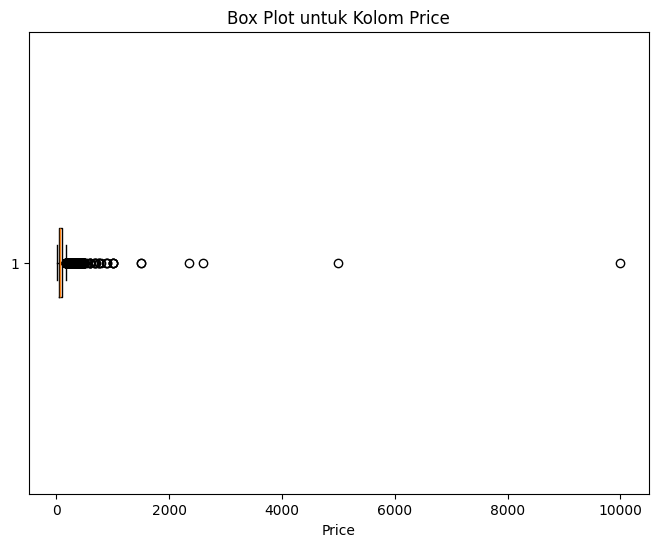

In [ ]:
# Membuat box plot untuk kolom 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Price')
plt.title('Box Plot untuk Kolom Price')
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'price'
data_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 4529


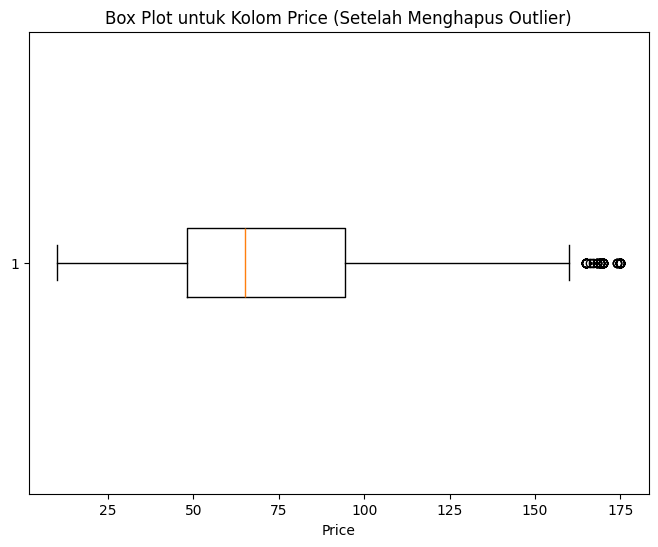

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['price'], vert=False)
plt.xlabel('Price')
plt.title('Box Plot untuk Kolom Price (Setelah Menghapus Outlier)')
plt.show()


**Number of Review**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'number of reviews'
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = df[(df['number_of_reviews'] < lower_bound) | (df['number_of_reviews'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom number of reviews : {len(outliers)}")

# # Opsional: Menghapus baris outlier dari DataFrame
# data_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Jumlah total outlier di kolom number of reviews : 433


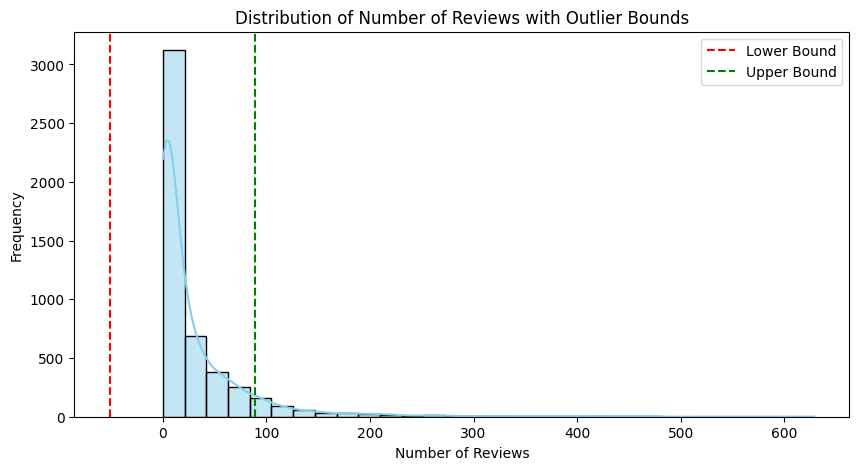

In [ ]:
# Histogram dengan garis batas untuk outlier
plt.figure(figsize=(10, 5))
sns.histplot(df['number_of_reviews'], bins=30, kde=True, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Distribution of Number of Reviews with Outlier Bounds')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'number_of_reviews'
data_no_outliers = df[(df['number_of_reviews'] >= lower_bound) & (df['number_of_reviews'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 4492


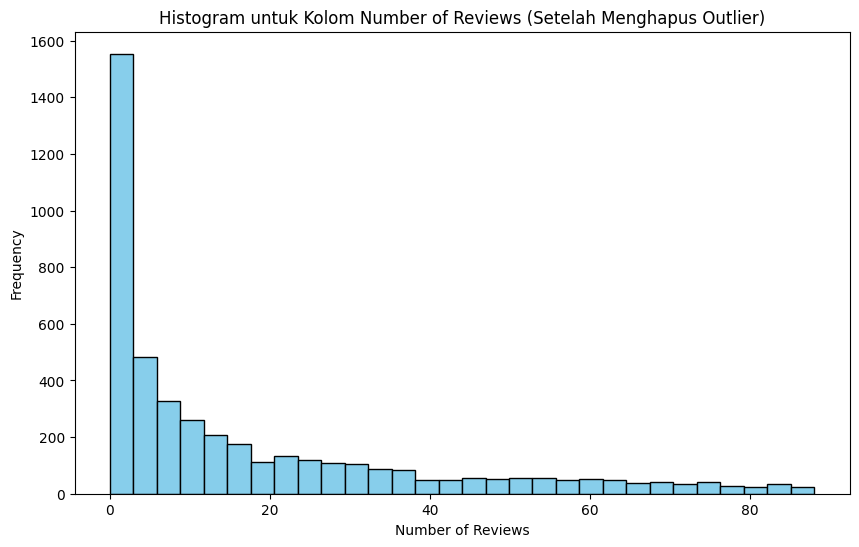

In [ ]:
# Membuat histogram untuk kolom 'number_of_reviews' setelah outlier dihapus
plt.figure(figsize=(10, 6))
plt.hist(data_no_outliers['number_of_reviews'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram untuk Kolom Number of Reviews (Setelah Menghapus Outlier)')
plt.show()

**Last Review**

In [ ]:
# Konversi kolom 'last_review' ke format datetime jika belum
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Konversi tanggal menjadi angka ordinal (jumlah hari sejak tanggal minimum)
df['last_review_numeric'] = (df['last_review'] - df['last_review'].min()).dt.days

# Hitung Q1, Q3, dan IQR pada kolom numerik
Q1 = df['last_review_numeric'].quantile(0.25)
Q3 = df['last_review_numeric'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier berdasarkan nilai numerik
outliers = df[(df['last_review_numeric'] < lower_bound) | (df['last_review_numeric'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom last review numeric : {len(outliers)}")

Jumlah total outlier di kolom last review numeric : 947


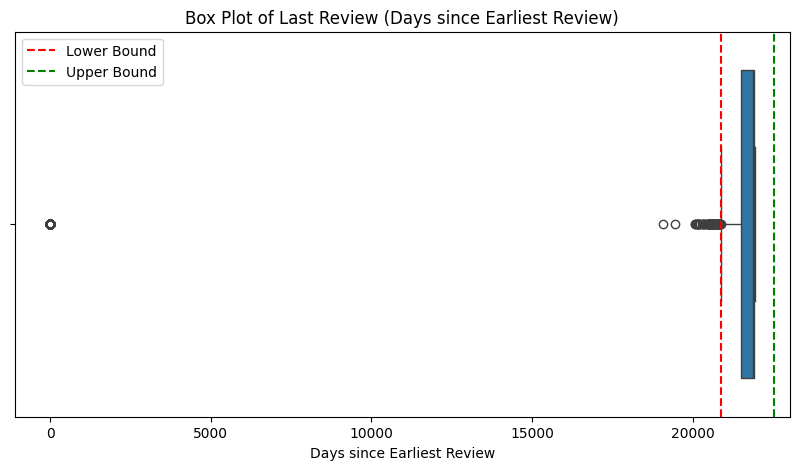

In [ ]:
# Visualisasi dengan box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['last_review_numeric'])
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Box Plot of Last Review (Days since Earliest Review)')
plt.xlabel('Days since Earliest Review')
plt.legend()
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'last_review_numeric'
data_no_outliers = df[(df['last_review_numeric'] >= lower_bound) & (df['last_review_numeric'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 3978


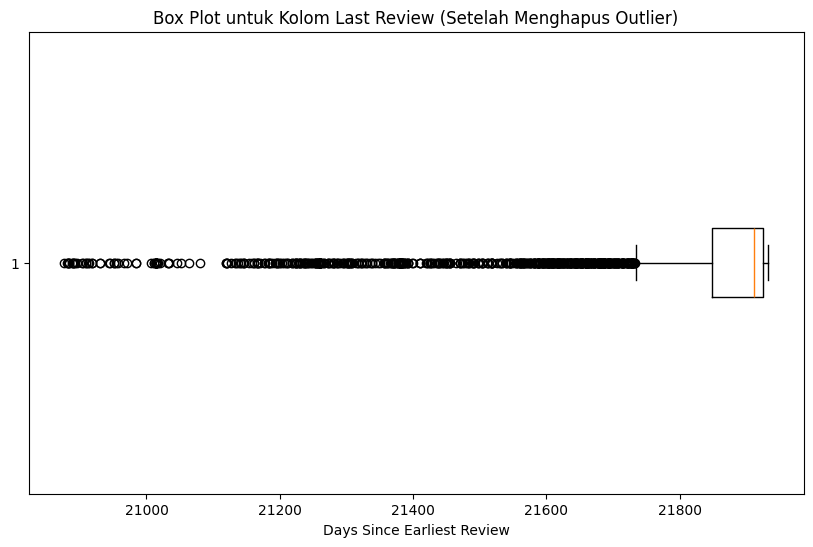

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_no_outliers['last_review_numeric'], vert=False)
plt.xlabel('Days Since Earliest Review')
plt.title('Box Plot untuk Kolom Last Review (Setelah Menghapus Outlier)')
plt.show()

**Review per Month**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'reviews per month'
Q1 = df['reviews_per_month'].quantile(0.25)
Q3 = df['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = df[(df['reviews_per_month'] < lower_bound) | (df['reviews_per_month'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom reviews per month : {len(outliers)}")

# # Opsional: Menghapus baris outlier dari DataFrame
# data_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Jumlah total outlier di kolom reviews per month : 227


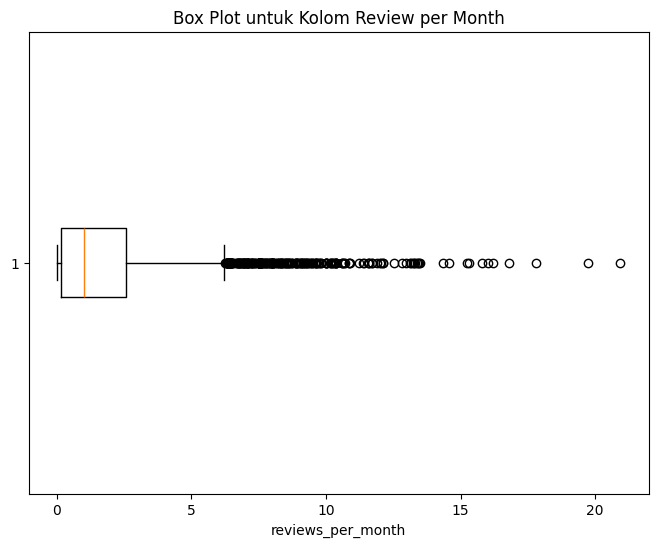

In [ ]:
# Membuat box plot untuk kolom 'reviews_per_month'
plt.figure(figsize=(8, 6))
plt.boxplot(df['reviews_per_month'], vert=False)
plt.xlabel('reviews_per_month')
plt.title('Box Plot untuk Kolom Review per Month')
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'reviews_per_month'
data_no_outliers = df[(df['reviews_per_month'] >= lower_bound) & (df['reviews_per_month'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 4698


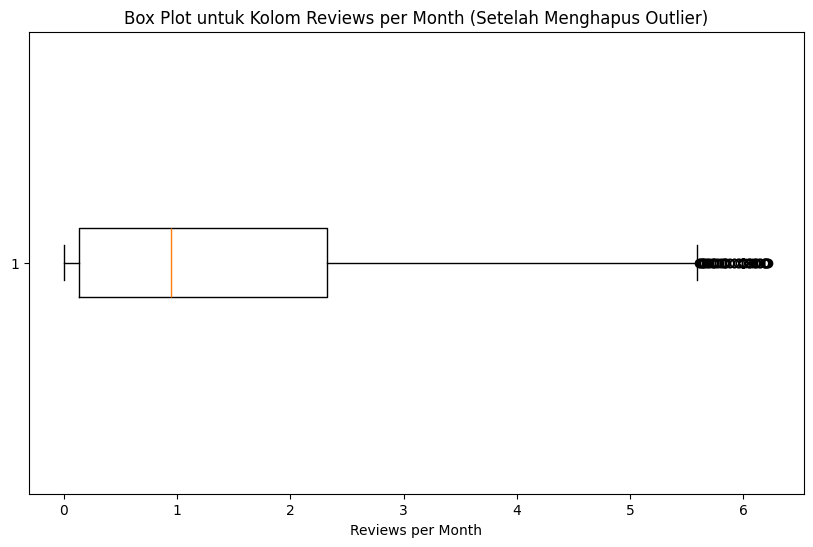

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_no_outliers['reviews_per_month'], vert=False)
plt.xlabel('Reviews per Month')
plt.title('Box Plot untuk Kolom Reviews per Month (Setelah Menghapus Outlier)')
plt.show()

# Final Data

In [ ]:
# Final data
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,non_alpha_count,name_cleaned,last_review_numeric
0,34229869,cozy living room futon,27537930,preston,bronx,pelham gardens,40.86209,-73.84667,shared room,20.0,1,0.0,1959-06-20,0.0,5,3,cozylivingroomfuton,0
1,31568673,large private room w/ 2 built-in closets,236631469,paloma,bronx,williamsbridge,40.88449,-73.86227,private room,25.0,30,0.0,1959-06-20,0.0,85,9,largeprivateroomwbuiltinclosets,0
2,36199363,furnished room for rent in bronx single female,272247972,kadeen,bronx,olinville,40.88116,-73.86547,shared room,25.0,90,0.0,1959-06-20,0.0,190,8,furnishedroomforrentinbronxsinglefemale,0
3,34180340,sunny & spacious room,181233778,aishah,bronx,belmont,40.85595,-73.88519,private room,27.0,30,0.0,1959-06-20,0.0,68,4,sunnyspaciousroom,0
4,32364762,bronx,19303369,hiroki,bronx,kingsbridge,40.88474,-73.90321,private room,27.0,30,0.0,1959-06-20,0.0,0,0,bronx,0
5,19054683,fully-furnished modern apartment,97907084,kim,bronx,wakefield,40.90281,-73.85201,entire home/apt,28.0,1,0.0,1959-06-20,0.0,0,3,fullyfurnishedmodernapartment,0
6,36243183,spacious private room #2,35783912,pi & leo,bronx,fordham,40.86264,-73.89139,private room,29.0,2,0.0,1959-06-20,0.0,81,5,spaciousprivateroom,0
7,33528562,"private, warm & inviting contemporary space.",252641467,antoinette,bronx,wakefield,40.88491,-73.85484,private room,33.0,1,0.0,1959-06-20,0.0,116,8,privatewarminvitingcontemporaryspace,0
8,18442048,clean-n-comfy bronx pad,25385574,che,bronx,allerton,40.86718,-73.86235,private room,33.0,1,0.0,1959-06-20,0.0,179,4,cleanncomfybronxpad,0
9,36243240,spacious private room #3,35783912,pi & leo,bronx,fordham,40.86263,-73.89088,private room,33.0,2,0.0,1959-06-20,0.0,84,5,spaciousprivateroom,0


# Nomor 1.

Harga rata-rata, termurah dan termahal yang disediakan per jenis tipe kamar beserta karakteristiknya. Expected column output :

- tipe ruangan
- harga rata-rata
- harga max
- harga min
- rata-rata minimum pemesanan (malam)
- rata- rata total review

In [ ]:
# Mengganti nama kolom ke bahasa Indonesia
df = df.rename(columns={
    'room_type': 'tipe_ruangan',
    'price': 'harga',
    'minimum_nights': 'minimum_malam',
    'number_of_reviews': 'total_review'
})

# Menghitung statistik per tipe ruangan
room_type_stats = df.groupby('tipe_ruangan').agg(
    harga_rata_rata=('harga', 'mean'),
    harga_max=('harga', 'max'),
    harga_min=('harga', 'min'),
    rata_rata_minimum_pemesanan_malam=('minimum_malam', 'mean'),
    rata_rata_total_review=('total_review', 'mean')
).reset_index()

# Menampilkan hasil
print("Harga rata-rata, termurah, dan termahal per jenis tipe ruangan beserta karakteristiknya:")
print(room_type_stats)

Harga rata-rata, termurah, dan termahal per jenis tipe ruangan beserta karakteristiknya:
      tipe_ruangan  harga_rata_rata  harga_max  harga_min  \
0  entire home/apt       143.706895     5000.0       10.0   
1     private room        65.166065      900.0       20.0   
2      shared room       103.712250    10000.0       11.0   

   rata_rata_minimum_pemesanan_malam  rata_rata_total_review  
0                           4.425777               35.823936  
1                           4.798398               27.900534  
2                           6.418848               13.015707  


# Nomor 2.

Total properti dan rata-rata harga per neighbourhood group. Expected column output :

- neighbourhood_group
- total_properti
- avg_price_properti

In [ ]:
# Mengganti nama kolom ke bahasa Indonesia
neighbourhood_group_stats = df.groupby('neighbourhood_group').agg(
    total_properti=('id', 'count'),
    rata_rata_harga_properti=('harga', 'mean')
).reset_index()

# Menampilkan hasil
print("\nTotal properti dan rata-rata harga per neighbourhood group:")
print(neighbourhood_group_stats)


Total properti dan rata-rata harga per neighbourhood group:
  neighbourhood_group  total_properti  rata_rata_harga_properti
0               bronx             768                 85.027396
1            brooklyn             747                 93.301311
2              queens            3410                 96.719071


# Nomor 3.

Dari tahun 2017-2019, berapa rata-rata reviews per month dan rata-rata availability kamar nya untuk setiap jenis tipe kamar per tahunnya Expected column output :

- year
- room_type
- avg_review_per_month
- avg_availability

In [ ]:
# Buat kolom 'year' berdasarkan kolom 'last_review'
df['year'] = df['last_review'].dt.year

# Filter data untuk tahun 2017 sampai 2019
df_filtered = df[df['year'].between(2017, 2019)]

# Group by 'year' dan 'room_type' untuk menghitung rata-rata reviews per month dan availability
yearly_room_stats = df_filtered.groupby(['year', 'tipe_ruangan']).agg(
    rata_rata_reviews_per_bulan=('reviews_per_month', 'mean'),
    rata_rata_ketersediaan=('availability_365', 'mean')
).reset_index()

# Menampilkan hasil
print("\nRata-rata reviews per bulan dan ketersediaan kamar dari tahun 2017-2019 setiap jenis tipe kamar per tahunnya:")
print(yearly_room_stats)


Rata-rata reviews per bulan dan ketersediaan kamar dari tahun 2017-2019 setiap jenis tipe kamar per tahunnya:
   year     tipe_ruangan  rata_rata_reviews_per_bulan  rata_rata_ketersediaan
0  2017  entire home/apt                     0.306190               63.571429
1  2017     private room                     0.320508               75.576271
2  2017      shared room                     0.088571              158.000000
3  2018  entire home/apt                     0.458837               91.310078
4  2018     private room                     0.593529              133.749226
5  2018      shared room                     0.276364              200.363636
6  2019  entire home/apt                     2.763579              183.438420
7  2019     private room                     2.458400              183.204211
8  2019      shared room                     1.804679              214.706422
